# Notebook for walking through the Bchron paper

- Haslett, J., & Parnell, A. (2008). A simple monotone process with application to radiocarbon-dated depth chronologies. Journal of the Royal Statistical Society Series C: Applied Statistics, 57(4), 399-418.

## import Python libraries

In [1]:
import numpy as np

from numpy.random import dirichlet
from numpy.random import poisson

import matplotlib.pyplot as plt

# import matplotlib colormap
import matplotlib.cm as cm
from matplotlib import colors

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## define functions for calculating stepwise summations

In [3]:
def progressive_sum(input_list):
    result = [0]  # Initialize an empty list to store the progressive sums
    current_sum = 0  # Initialize the current sum to 0

    for i in range(len(input_list)):
        current_sum += input_list[i]  # Add the current item to the current sum
        result.append(current_sum)  # Append the current sum to the result list
    return np.array(result)

## using the dirichlet function to sample x-y paths following figure 3 of Haslett and Parnell (2008)

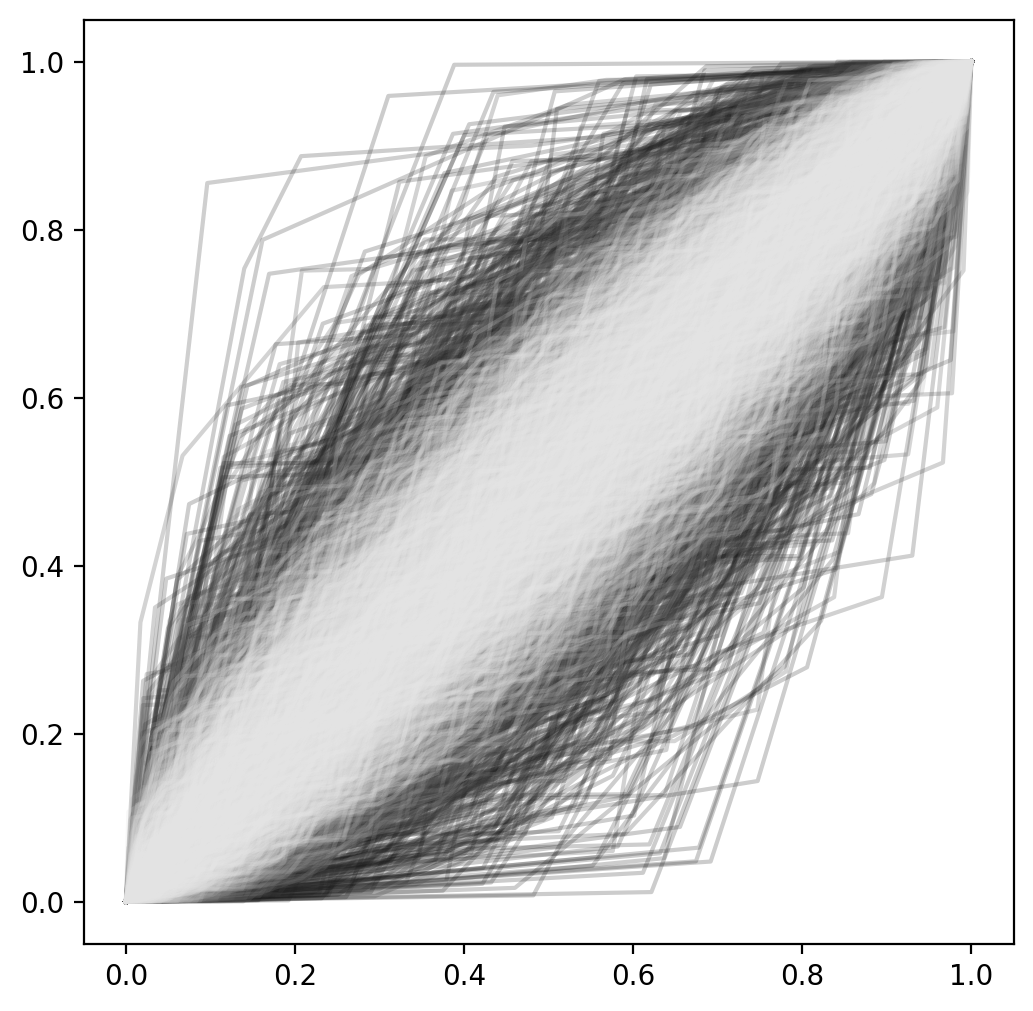

In [5]:
alpha = 4

interval_range = range(1, 50)
colormap = plt.cm.Greys_r 

norm = colors.Normalize(vmin=min(interval_range), vmax=max(interval_range)*1.2)
scalar_map = plt.cm.ScalarMappable(cmap=colormap, norm=norm)

n_resample = 100

plt.figure(figsize=(6,6))
for i in interval_range:
    y_intervals = dirichlet(np.full(i+1, 1), n_resample)
    x_intervals = dirichlet(np.full(i+1, alpha), n_resample)

    this_color = scalar_map.to_rgba(i)

    for j in range(n_resample):
        y = progressive_sum(y_intervals[j])
        x = progressive_sum(x_intervals[j])

        plt.plot(x, y, color=this_color,  alpha=0.2)

## one could also do the same with random sampling of the number of knots with a poisson distribution

## fixing alpha=4 while changing lambda

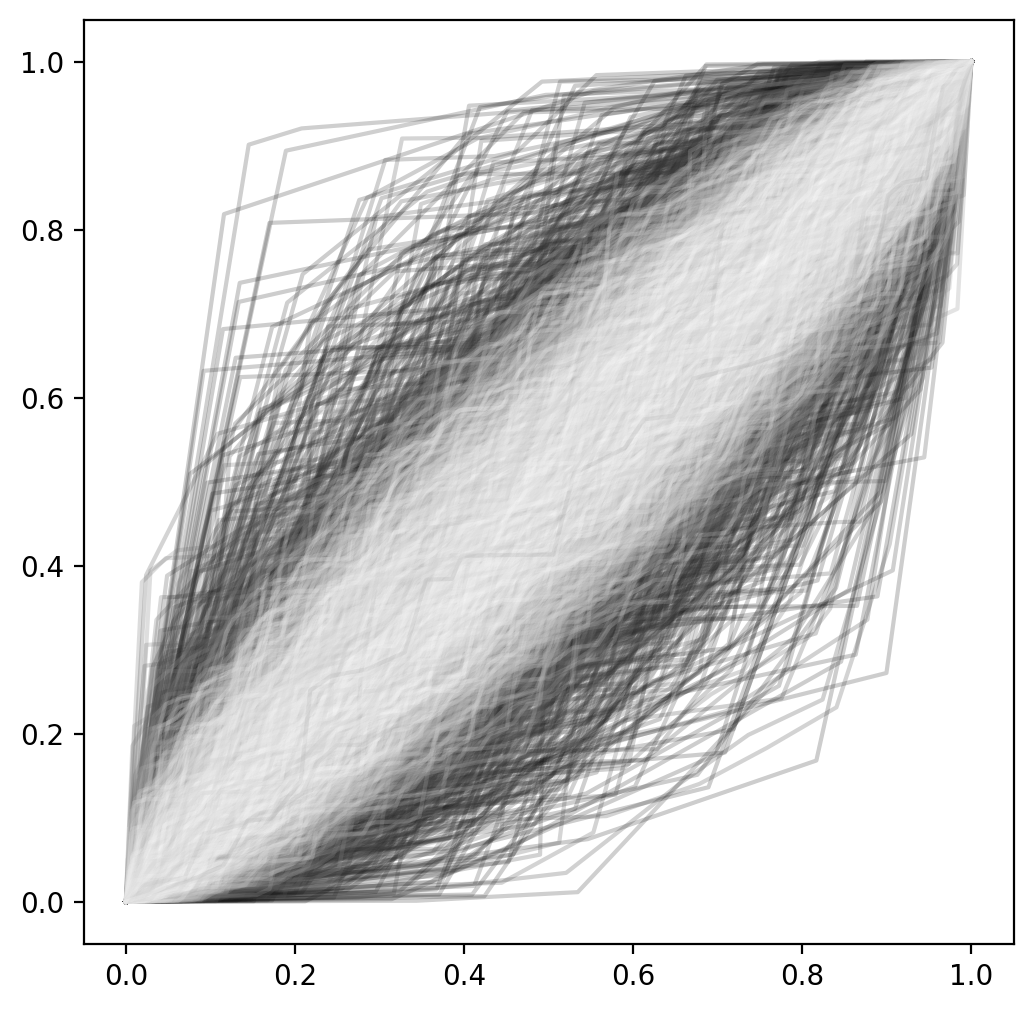

In [6]:
poisson_lambda = np.arange(1, 50, 1)

resample_n = 100


xs = []
ys = []

plt.figure(figsize=(6,6))
for i in poisson_lambda:
    these_Ns = poisson(i, resample_n)
    these_Ns = [item for item in these_Ns if item > 1]
    # print(these_lambdas)
    for l in these_Ns:
        y_intervals = dirichlet(np.full(l+1, 1), 1)[0]
        x_intervals = dirichlet(np.full(l+1, alpha), 1)[0]

        # print(y_intervals, x_intervals)
        y = progressive_sum(y_intervals)
        x = progressive_sum(x_intervals)

        this_color = scalar_map.to_rgba(l)

        # ys.append(y)
        # xs.append(x)
        plt.plot(x, y, color=this_color, alpha=0.2)
# plt.xlim(0, 1)
# plt.ylim(0, 1)


## fixing lambda = 1 while changing alpha

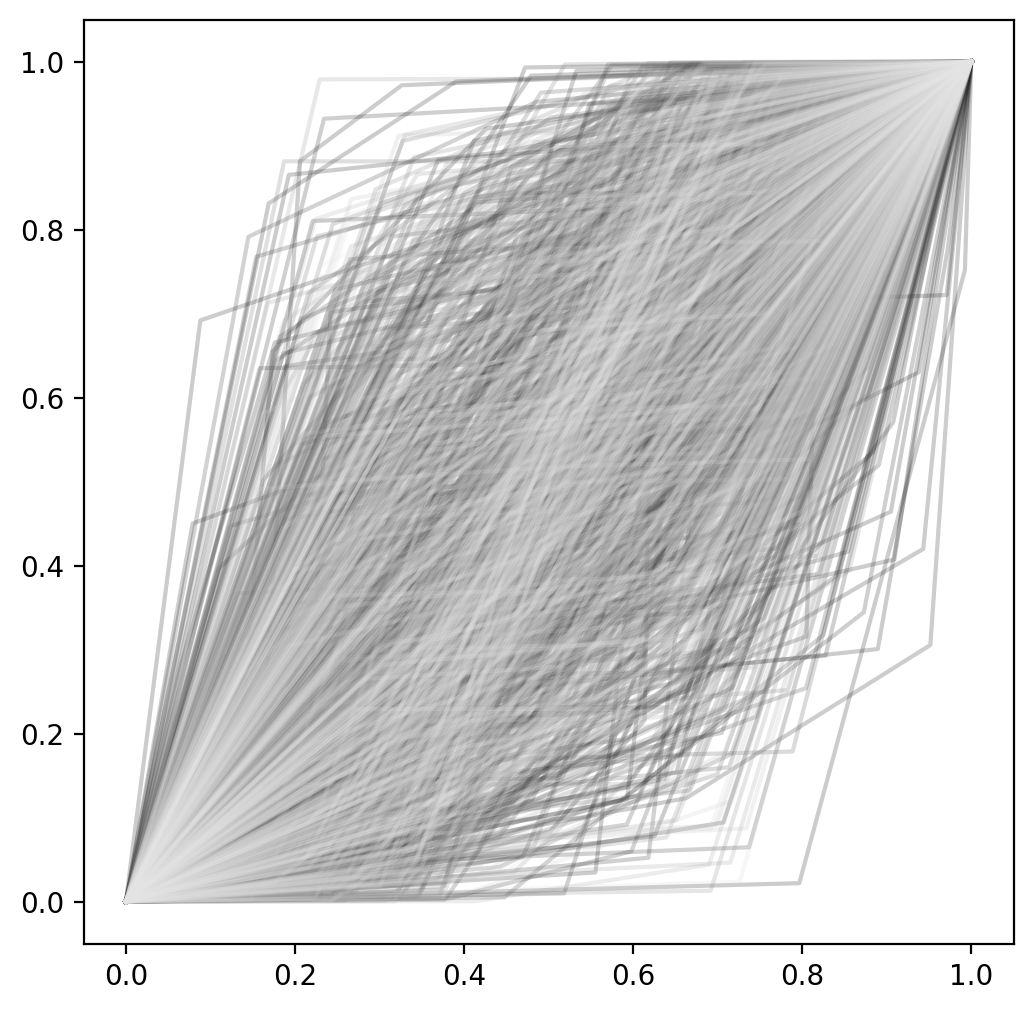

In [9]:
poisson_lambda = 1
alpha = np.arange(1, 50, 1)

resample_n = 100

xs = []
ys = []

plt.figure(figsize=(6,6))
for i in alpha:
    these_Ns = poisson(poisson_lambda, resample_n)
    these_Ns = [item for item in these_Ns if item > 1]
    # print(these_lambdas)
    for l in these_Ns:
        y_intervals = dirichlet(np.full(l+1, 1), 1)[0]
        x_intervals = dirichlet(np.full(l+1, i), 1)[0]

        # print(y_intervals, x_intervals)
        y = progressive_sum(y_intervals)
        x = progressive_sum(x_intervals)

        this_color = scalar_map.to_rgba(i)

        # ys.append(y)
        # xs.append(x)
        plt.plot(x, y, color=this_color, alpha=0.2)
# plt.xlim(0, 1)
# plt.ylim(0, 1)
